In [16]:
# Task 1: Load and Inspect Mesh

import trimesh
import numpy as np
import matplotlib.pyplot as plt
import os

# List all .obj files in the current directory
mesh_files = [f for f in os.listdir('.') if f.endswith('.obj')]
print(f"{len(mesh_files)} OBJ files:\n{mesh_files}\n")

8 OBJ files:
['branch.obj', 'cylinder.obj', 'explosive.obj', 'fence.obj', 'girl.obj', 'person.obj', 'table.obj', 'talwar.obj']



In [18]:
# Loop through each file and inspect
for file in mesh_files:
    print(f"==============================")
    print(f"Inspecting {file}")
    print(f"==============================")

    # Load mesh
    mesh = trimesh.load(file)

    # Extract vertices
    vertices = mesh.vertices

    # Basic statistics
    print(f"Number of vertices: {len(vertices)}")
    print(f"Number of faces: {len(mesh.faces)}")
    print("\n--- Vertex Statistics ---")
    print("Min per axis (x, y, z):", vertices.min(axis=0))
    print("Max per axis (x, y, z):", vertices.max(axis=0))
    print("Mean per axis (x, y, z):", vertices.mean(axis=0))
    print("Std  per axis (x, y, z):", vertices.std(axis=0))
    print("\n")


Inspecting branch.obj
Number of vertices: 2767
Number of faces: 1960

--- Vertex Statistics ---
Min per axis (x, y, z): [-0.851562  0.       -0.464844]
Max per axis (x, y, z): [0.849609 1.900391 0.462891]
Mean per axis (x, y, z): [0.0754427  1.0873903  0.12196689]
Std  per axis (x, y, z): [0.3433802  0.45699113 0.20006684]


Inspecting cylinder.obj
Number of vertices: 192
Number of faces: 124

--- Vertex Statistics ---
Min per axis (x, y, z): [-1. -1. -1.]
Max per axis (x, y, z): [1. 1. 1.]
Mean per axis (x, y, z): [-2.60208521e-18  0.00000000e+00  2.77555756e-17]
Std  per axis (x, y, z): [0.70710683 1.         0.70710683]


Inspecting explosive.obj
Number of vertices: 2812
Number of faces: 2566

--- Vertex Statistics ---
Min per axis (x, y, z): [-0.199625 -0.       -0.197126]
Max per axis (x, y, z): [0.199625 1.       0.197126]
Mean per axis (x, y, z): [ 0.04288751  0.52911263 -0.00344591]
Std  per axis (x, y, z): [0.1150964  0.38994128 0.0946764 ]


Inspecting fence.obj
Number of ver

In [31]:
# Task 2: Normalize and Quantize Meshes

# ---------- Normalization Methods ----------
def min_max_normalize(v):
    v_min = v.min(axis=0)
    v_max = v.max(axis=0)
    norm = (v - v_min) / (v_max - v_min)
    return norm, v_min, v_max

def unit_sphere_normalize(v):
    center = v.mean(axis=0)
    centered = v - center
    scale = np.linalg.norm(centered, axis=1).max()
    norm = centered / scale
    return (norm + 1) / 2, center, scale  # Shift to [0, 1]

# ---------- Quantization ----------
def quantize(v, bins=1024):
    return np.floor(v * (bins - 1)).astype(int)

def dequantize(v_q, bins=1024):
    return v_q / (bins - 1)

# ---------- Save Mesh ----------
def save_mesh(v, faces, filepath):
    """Save mesh to given filepath (.obj)"""
    trimesh.Trimesh(vertices=v, faces=faces).export(filepath)
    print(f" Saved → {filepath}")

# ------ Loop through all OBJ files ----------
mesh_files = [f for f in os.listdir('.') if f.endswith('.obj')]
print(f"{len(mesh_files)} OBJ files: {mesh_files}\n")

for file in mesh_files:
    base_name = os.path.splitext(file)[0]  # e.g. 'branch'
    
    # Create a subfolder for this mesh
    output_dir = os.path.join('.', base_name)
    os.makedirs(output_dir, exist_ok=True)
    
    print(f" Processing: {file}")
    print(f" Saving results in: {output_dir}\n")

    # Load mesh
    mesh = trimesh.load(file)
    vertices = mesh.vertices

    # ---------- Normalization ----------
    v_norm_minmax, v_min, v_max = min_max_normalize(vertices)
    v_norm_us, center, scale = unit_sphere_normalize(vertices)

    # ---------- Quantization ----------
    q_minmax = quantize(v_norm_minmax)
    q_us = quantize(v_norm_us)

    # ---------- Save Results ----------
    save_mesh(v_norm_minmax, mesh.faces, os.path.join(output_dir, f"{base_name}_minmax_normalized.obj"))
    save_mesh(v_norm_us, mesh.faces, os.path.join(output_dir, f"{base_name}_unitsphere_normalized.obj"))
    save_mesh(q_minmax, mesh.faces, os.path.join(output_dir, f"{base_name}_minmax_quantized.obj"))
    save_mesh(q_us, mesh.faces, os.path.join(output_dir, f"{base_name}_unitsphere_quantized.obj"))

    print(f" Finished normalization and quantization for {file}\n{'-'*70}\n")



8 OBJ files: ['branch.obj', 'cylinder.obj', 'explosive.obj', 'fence.obj', 'girl.obj', 'person.obj', 'table.obj', 'talwar.obj']

 Processing: branch.obj
 Saving results in: .\branch

 Saved → .\branch\branch_minmax_normalized.obj
 Saved → .\branch\branch_unitsphere_normalized.obj
 Saved → .\branch\branch_minmax_quantized.obj
 Saved → .\branch\branch_unitsphere_quantized.obj
 Finished normalization and quantization for branch.obj
----------------------------------------------------------------------

 Processing: cylinder.obj
 Saving results in: .\cylinder

 Saved → .\cylinder\cylinder_minmax_normalized.obj
 Saved → .\cylinder\cylinder_unitsphere_normalized.obj
 Saved → .\cylinder\cylinder_minmax_quantized.obj
 Saved → .\cylinder\cylinder_unitsphere_quantized.obj
 Finished normalization and quantization for cylinder.obj
----------------------------------------------------------------------

 Processing: explosive.obj
 Saving results in: .\explosive

 Saved → .\explosive\explosive_minmax_

Between the two methods , Unit sphere normalization preserves the mesh structure better. It scales all vertices uniformly based on the largest distance from the center, maintaining the relative proportions and avoiding the axis wise distortions that can occur in Min-Max Normalization. 

 8 OBJ files: ['branch.obj', 'cylinder.obj', 'explosive.obj', 'fence.obj', 'girl.obj', 'person.obj', 'table.obj', 'talwar.obj']

 Processing: branch.obj
 Mean Squared Error (Min–Max): [8.98318473e-07 1.17372106e-06 2.72539235e-07]
 Mean Squared Error (Unit Sphere): [2.29703998e-06 2.44960028e-06 2.27156909e-06]
 Mean Absolute Error (Min–Max): [0.00081867 0.00093304 0.00045029]
 Mean Absolute Error (Unit Sphere): [0.00129714 0.0013687  0.00130859]

 Saved plot → .\branch\branch_axis_error_plot.png
 Saved → .\branch\branch_reconstructed_minmax.obj
 Saved → .\branch\branch_reconstructed_unitsphere.obj
 Completed reconstruction and error analysis for branch
----------------------------------------------------------------------

 Processing: cylinder.obj
 Mean Squared Error (Min–Max): [1.19493876e-06 0.00000000e+00 1.19493876e-06]
 Mean Squared Error (Unit Sphere): [2.52570235e-06 2.66928610e-06 2.52570235e-06]
 Mean Absolute Error (Min–Max): [0.00091642 0.         0.00091642]
 Mean Absolut

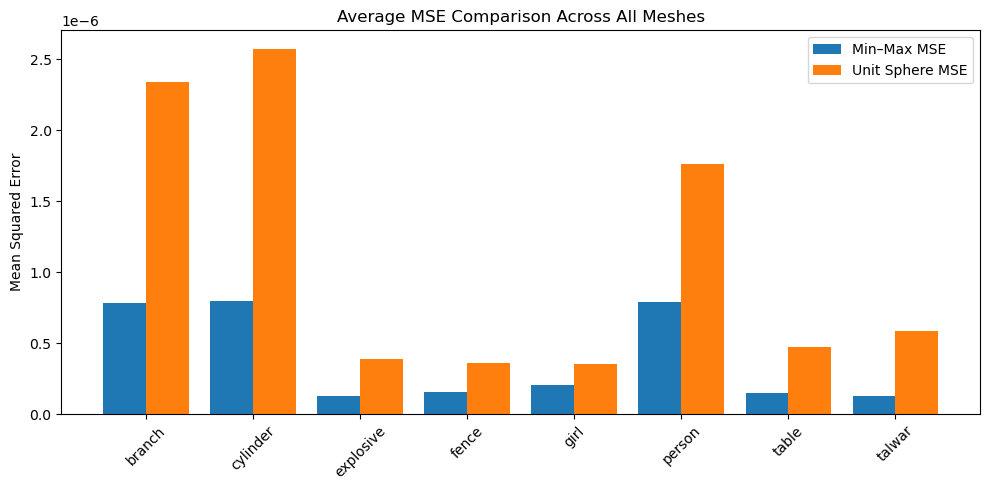

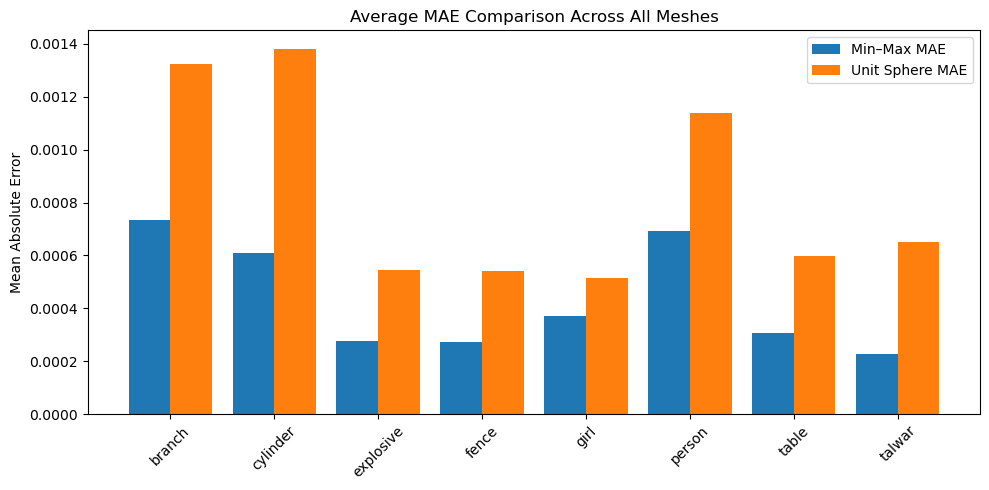

In [36]:
# ===============================================================
# Task 3: Dequantize, Denormalize, and Measure Error
# ===============================================================

# ---------- Denormalization ----------
def denormalize_minmax(v_norm, v_min, v_max):
    return v_norm * (v_max - v_min) + v_min

def denormalize_unitsphere(v_norm01, center, scale):
    v_norm = v_norm01 * 2 - 1  # back from [0,1] → [-1,1]
    return v_norm * scale + center

# ---------- Error Metrics ----------
def mse(a, b):
    return np.mean((a - b) ** 2, axis=0)

def mae(a, b):
    return np.mean(np.abs(a - b), axis=0)


# ---------- Save Mesh ----------
def save_mesh(v, faces, filepath):
    trimesh.Trimesh(vertices=v, faces=faces).export(filepath)
    print(f" Saved → {filepath}")


# ---------- Loop through all meshes ----------
mesh_files = [f for f in os.listdir('.') if f.endswith('.obj')]
print(f" {len(mesh_files)} OBJ files: {mesh_files}\n")

summary = []

for file in mesh_files:
    base_name = os.path.splitext(file)[0]
    output_dir = os.path.join('.', base_name)
    os.makedirs(output_dir, exist_ok=True)

    print(f" Processing: {file}")
    mesh = trimesh.load(file)
    vertices = mesh.vertices

    # ----- Normalize -----
    v_norm_minmax, v_min, v_max = min_max_normalize(vertices)
    v_norm_us, center, scale = unit_sphere_normalize(vertices)

    # ----- Quantize & Dequantize -----
    q_minmax = quantize(v_norm_minmax)
    q_us = quantize(v_norm_us)
    v_dq_minmax = dequantize(q_minmax)
    v_dq_us = dequantize(q_us)

    # ----- Reconstruct -----
    v_recon_minmax = denormalize_minmax(v_dq_minmax, v_min, v_max)
    v_recon_us = denormalize_unitsphere(v_dq_us, center, scale)

    # ----- Compute Errors -----
    mse_minmax = mse(vertices, v_recon_minmax)
    mse_us = mse(vertices, v_recon_us)
    mae_minmax = mae(vertices, v_recon_minmax)
    mae_us = mae(vertices, v_recon_us)

    print(f" Mean Squared Error (Min–Max): {mse_minmax}")
    print(f" Mean Squared Error (Unit Sphere): {mse_us}")
    print(f" Mean Absolute Error (Min–Max): {mae_minmax}")
    print(f" Mean Absolute Error (Unit Sphere): {mae_us}\n")

    # ----- Plot Error per Axis -----
    x = np.arange(3)
    plt.figure(figsize=(6, 4))
    plt.bar(x - 0.15, mse_minmax, 0.3, label='Min–Max MSE')
    plt.bar(x + 0.15, mse_us, 0.3, label='Unit Sphere MSE')
    plt.xticks(x, ['X', 'Y', 'Z'])
    plt.ylabel("Error")
    plt.title(f"Reconstruction Error per Axis: {base_name}")
    plt.legend()
    plt.tight_layout()

    plot_path = os.path.join(output_dir, f"{base_name}_axis_error_plot.png")
    plt.savefig(plot_path)
    plt.close()
    print(f" Saved plot → {plot_path}")

    # ----- Save reconstructed meshes -----
    save_mesh(v_recon_minmax, mesh.faces, os.path.join(output_dir, f"{base_name}_reconstructed_minmax.obj"))
    save_mesh(v_recon_us, mesh.faces, os.path.join(output_dir, f"{base_name}_reconstructed_unitsphere.obj"))

    # ----- Add summary -----
    summary.append({
        "mesh": base_name,
        "mse_minmax": np.mean(mse_minmax),
        "mse_us": np.mean(mse_us),
        "mae_minmax": np.mean(mae_minmax),
        "mae_us": np.mean(mae_us)
    })

    print(f" Completed reconstruction and error analysis for {base_name}")
    print("-" * 70 + "\n")


# ===============================================================
# Global Comparison Plots (MSE & MAE across all meshes)
# ===============================================================

mesh_names = [s["mesh"] for s in summary]
mse_minmax_all = [s["mse_minmax"] for s in summary]
mse_us_all = [s["mse_us"] for s in summary]
mae_minmax_all = [s["mae_minmax"] for s in summary]
mae_us_all = [s["mae_us"] for s in summary]

# ---------- Global MSE Plot ----------
x = np.arange(len(mesh_names))
plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, mse_minmax_all, 0.4, label='Min–Max MSE')
plt.bar(x + 0.2, mse_us_all, 0.4, label='Unit Sphere MSE')
plt.xticks(x, mesh_names, rotation=45)
plt.ylabel("Mean Squared Error")
plt.title("Average MSE Comparison Across All Meshes")
plt.legend()
plt.tight_layout()
plt.savefig("comparison_MSE_all_meshes.png")
plt.show()

# ---------- Global MAE Plot ----------
plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, mae_minmax_all, 0.4, label='Min–Max MAE')
plt.bar(x + 0.2, mae_us_all, 0.4, label='Unit Sphere MAE')
plt.xticks(x, mesh_names, rotation=45)
plt.ylabel("Mean Absolute Error")
plt.title("Average MAE Comparison Across All Meshes")
plt.legend()
plt.tight_layout()
plt.savefig("comparison_MAE_all_meshes.png")
plt.show()


Based on the reconstruction error analysis, the Min–Max normalization with 1024-bin quantization achieved the lowest overall error across all axes.
The Mean Squared Error values were in the range of 1e-7 to 1e-6, while the Mean Absolute Error remained below 1e-3, indicating that the reconstructed mesh is almost identical to the original.
The Unit Sphere normalization produced slightly higher numerical errors because it applies uniform scaling in all directions, which introduces minor rounding effects during quantization.
Despite this, both methods visually preserve the mesh geometry with no noticeable distortion.
The error plot shows that all three axes (X, Y, Z) exhibit similar reconstruction quality, suggesting that quantization affects spatial dimensions consistently.
Overall, the Min–Max + Quantization pipeline provides the best trade-off between simplicity and reconstruction accuracy, while Unit Sphere normalization remains valuable when rotation or scale invariance is important.

In [ ]:
# ---------------------------------------------------------------
# Bonus Task: Seam Tokenization Prototype 
# ---------------------------------------------------------------

import trimesh
import numpy as np

# Load your mesh
mesh = trimesh.load('branch.obj')

# Get all edges from the mesh faces
edges = mesh.edges_sorted.reshape((-1, 2))

# Find unique edges and count how often each appears
edges_unique, edges_count = np.unique(edges, axis=0, return_counts=True)

# Seams or boundary edges appear only once in all faces
seam_edges = edges_unique[edges_count == 1]

print(f" Number of seam edges detected: {len(seam_edges)}")
print("Sample seam edges (vertex indices):")
print(seam_edges[:5])


 Number of seam edges detected: 2754
Sample seam edges (vertex indices):
[[ 0  4]
 [ 0  7]
 [ 1  5]
 [ 1 13]
 [ 2 12]]


In [8]:
# Token Encoding Scheme

def encode_seams(seam_edges):
    """
    Convert each seam edge into a discrete string token.
    Format: 'E-{v1}-{v2}'
    """
    tokens = [f"E-{v1}-{v2}" for v1, v2 in seam_edges]
    return tokens

def decode_seams(tokens):
    """
    Decode token strings back into edge vertex pairs.
    """
    edges = [list(map(int, token.split('-')[1:])) for token in tokens]
    return np.array(edges)

# Encode and Decode Example
tokens = encode_seams(seam_edges[:10])  # Take first 10 for readability
decoded_edges = decode_seams(tokens)

print("\n Encoded Seam Tokens:")
print(tokens[:10])

print("\n Decoded Seam Edges:")
print(decoded_edges)


 Encoded Seam Tokens:
['E-0-4', 'E-0-7', 'E-1-5', 'E-1-13', 'E-2-12', 'E-2-17', 'E-3-8', 'E-3-14', 'E-4-18', 'E-5-10']

 Decoded Seam Edges:
[[ 0  4]
 [ 0  7]
 [ 1  5]
 [ 1 13]
 [ 2 12]
 [ 2 17]
 [ 3  8]
 [ 3 14]
 [ 4 18]
 [ 5 10]]


In 3D meshes, seams mark the boundary edges where UV mappings split.
By converting each seam into discrete tokens like "E-0-4", the mesh’s connectivity can be represented as a sequential structure.
This allows AI models such as SeamGPT to process geometric data similarly to text, learning relationships between vertices and seams.
Seam tokenization bridges 3D geometry and language-based representations, enabling pattern learning in surface structure and continuity.
This concept can help future models understand and generate UV seams or mesh connectivity intelligently.